<a href="https://colab.research.google.com/github/jane95924/JANE_WEEK2_CORE/blob/master/WEEK2_IP_CORE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

**DEFINING THE QUESTION**

figure out how  we can predict which indvidual is most likely to have or  use a bank account


 **DEFINE METRIC** **FOR**  **SUCCESS**
 
1) Identify the age group with the most bank accounts.

2) Identify household size with the most bank accounts.

3) Identify which gender has the most number of bank accounts in different countries.

4) Identify which country has the most number of bank accounts as compared to those with the least.

5) Corelate individual countries to Levels of education.
6) Corelate Levels of Education corelate with people who have bank accounts.
7) Corelate Access to Cell Phones with people who have bank accounts.

 **CONTEXT**

 **EXPERIMENTAL DESIGN TAKEN**

 **APPROPRIATENESS OF THE AVAILABLE DATA**




In [1]:
#importing the required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading and previewing our variable dataset
variables = pd.read_csv('/content/VariableDefinitions.csv')
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [3]:
#loading and previewing of financial dataset
df=pd.read_csv('/content/Financial Dataset - 1.csv')
df.head(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1.0,42.0,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3.0,76.0,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [4]:
#previewing our tail in our financial dataset
df.tail(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23514,Uganda,2018,uniqueid_2107,No,Urban,Yes,NaN,24.0,Female,Spouse,Married/Living together,Primary education,Self employed
23515,Uganda,2018,uniqueid_2108,No,Rural,No,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23516,Uganda,2018,uniqueid_2109,No,Urban,Yes,NaN,35.0,Male,Head of Household,Married/Living together,Primary education,Self employed
23517,Uganda,2018,uniqueid_2110,No,Urban,Yes,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23518,Uganda,2018,uniqueid_2111,No,Rural,Yes,NaN,20.0,Female,Child,Single/Never Married,Primary education,No Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


Understanding our data for analysis


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [6]:
df.describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_36,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


From our data,

the total number of respondents in this dataset is 23490

the mean of the age respondent is 38, the standard deviation is 16.


the youngest respondent is aged 16 while the oldest is age 100



In [7]:
df.shape

(23524, 13)

In [8]:
df.count()

country                   23510
year                      23524
uniqueid                  23524
Has a Bank account        23488
Type of Location          23509
Cell Phone Access         23513
household_size            23496
Respondent Age            23490
gender_of_respondent      23490
The relathip with head    23520
marital_status            23492
Level of Educuation       23495
Type of Job               23494
dtype: int64

In [4]:
# count the number of people who have a bank account.
#NO means the respondent has no bank account.
#Yes means the respondents has a bank account
df['Has a Bank account'].value_counts()

No     20179
Yes     3309
Name: Has a Bank account, dtype: int64

Seperate the dataset to two dataframes, one with bank account and the other without.

In [5]:
df_yes= df[df['Has a Bank account']=='Yes']

In [11]:
df_yes.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
11,Kenya,2018,uniqueid_12,Yes,Rural,Yes,3.0,69.0,Male,Head of Household,Married/Living together,Secondary education,Other Income
17,Kenya,2018,uniqueid_18,Yes,Rural,Yes,6.0,27.0,Female,Head of Household,Married/Living together,Secondary education,Self employed


In [6]:
# dataset with respondents that have bank account
df_no=df[df['Has a Bank account']=='No']

In [13]:
df_no.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed


in the dataset, NO = 20179 respondents means they do not have a bank account,

Yes = 3309 respondents have a bank account.

DATA CLEANING.

In [14]:
#checking for outliers
df['year'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

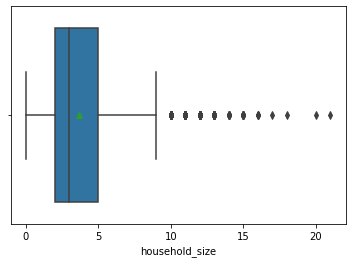

In [15]:
#Household_size
sns.boxplot(df['household_size'], showmeans=True)



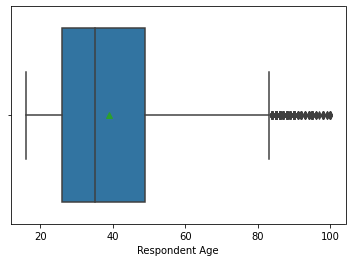

In [11]:
#Respondent age
sns.boxplot(df['Respondent Age'], showmeans=True)

In [16]:
#checking for anomalies
print(df.nunique())

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64


In [17]:
# Checking for anomalies
q1_age = df['Respondent Age'].quantile(.25)
q3_age = df['Respondent Age'].quantile(.75)
iqr_age = q3_age - q1_age

q1_size = df['household_size'].quantile(.25)
q3_size = df['household_size'].quantile(.75)
iqr_size = q3_size - q1_size

q1_year =df['year'].quantile(.25)
q3_year = df['year'].quantile(.75)
iqr_year = q3_year - q1_year

print(iqr_age,iqr_size,iqr_year)

23.0 3.0 2.0


In [7]:
#check for null values in our dataset
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [8]:
#dropping null values in our dataset
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

UNIVARIATE ANALYSIS

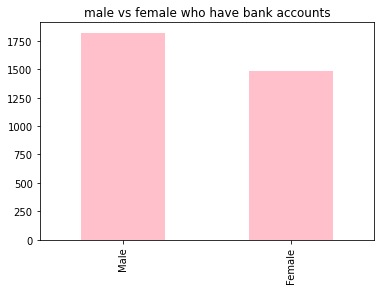

In [21]:
#comparing the gender
df_yes['gender_of_respondent'].value_counts().plot.bar(title='male vs female who have bank accounts', color='pink')

From our graph above, more males have bank account compared to the number of females.

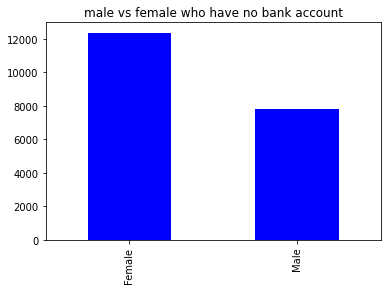

In [22]:
df_no['gender_of_respondent'].value_counts().plot.bar(title='male vs female who have no bank account', color='blue')

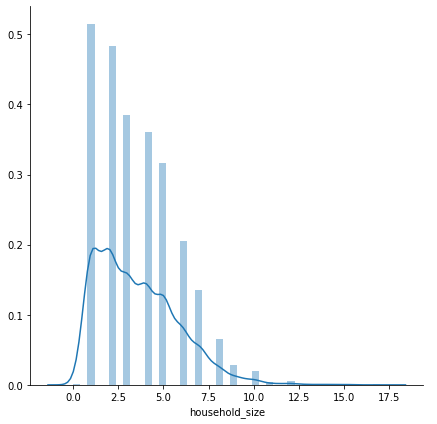

In [23]:
#looking for the house_size with the most bank account
sns.FacetGrid(df_yes, height =6).map(sns.distplot,"household_size").add_legend()

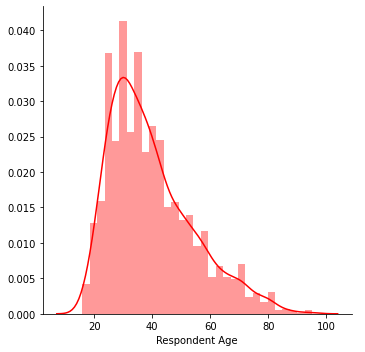

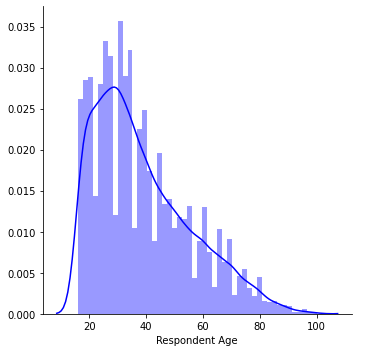

In [24]:
#the age group with the most bank accounts.
sns.FacetGrid(df_yes, height =5).map(sns.distplot,"Respondent Age",color='red').add_legend()
# the age group that has no bank accounts.
sns.FacetGrid(df_no, height =5).map(sns.distplot,"Respondent Age",color='blue').add_legend()

from the graph above, age group 30 t0 40 are the ones that have most bank accounts 

BIVARIATE ANALYSIS

In [10]:
#the correlation 
df.corr()

,year,household_size,Respondent Age
year,1.000000,-0.048902,-0.019062
household_size,-0.048902,1.000000,-0.119709
Respondent Age,-0.019062,-0.119709,1.000000


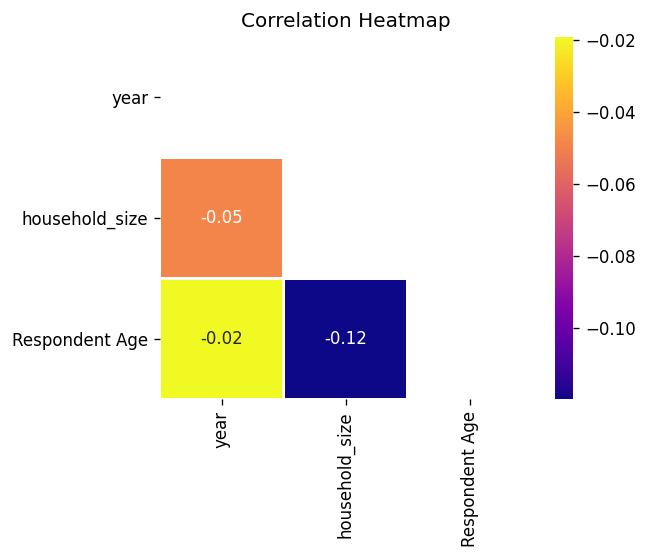

In [11]:
# Correlation
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

the respondent ageis weakly correlated to year and the house which is -0.119709

[Text(0, 0.5, 'Number of Respondents'),
 Text(0.5, 1.0, 'Cell Phone Access by Gender')]

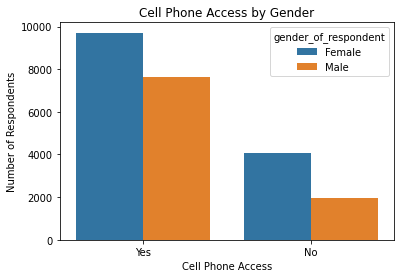

In [27]:
#Male vs female access to cellphones
#sns.countplot('gender_of_respondent', hue='Cell Phone Access', data=df)
ax = sns.countplot('Cell Phone Access', hue='gender_of_respondent', data=df)
ax.set(ylabel = 'Number of Respondents',
       title = 'Cell Phone Access by Gender')

from  chart above, more females have access to cellphones compared to men

[Text(0, 0.5, 'Number of Respondents'),
 Text(0.5, 1.0, 'Education levels by Gender')]

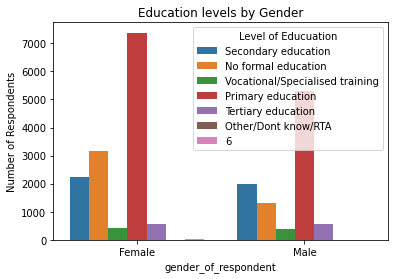

In [28]:
#Male vs female level of education
ax = sns.countplot('gender_of_respondent', hue='Level of Educuation', data=df)
ax.set(ylabel = 'Number of Respondents',
       title = 'Education levels by Gender')

from the graph above, females have a high number in almost each level of education.

females also have the nost number with no formal education

[Text(0, 0.5, 'Number of Respondents'),
 Text(0.5, 1.0, 'Cellphone access across different employment types')]

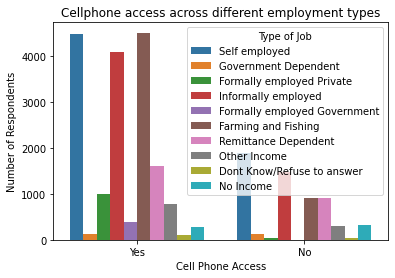

In [29]:
#Cellphone access across different employment types

ax = sns.countplot('Cell Phone Access', hue='Type of Job', data=df)
ax.set(ylabel = 'Number of Respondents',
       title = 'Cellphone access across different employment types')

from the above graph, the self employed and those doing farming and fishing have cell phone access. most of the self employed too have no cell phone access.

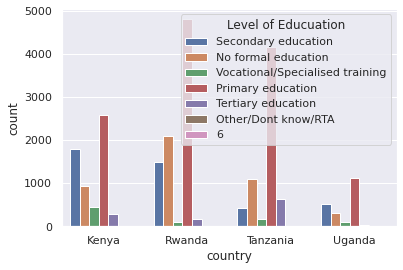

In [30]:
#check the country with the level of education
sns.set(style="darkgrid")
ax = sns.countplot(x='country', hue= "Level of Educuation", data=df)
plt.show()

from above, the level of education in uganda is the lowest compared to the other countries,kenya has the highest tertiary education.

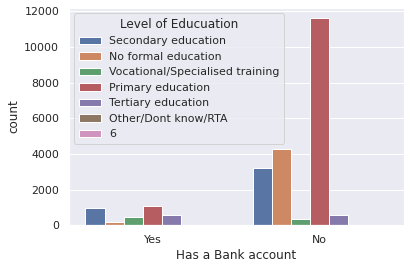

In [31]:
# How do the various Levels of Education corelate with people who have bank accounts?
sns.set(style="darkgrid")
ax = sns.countplot(x='Has a Bank account', hue= "Level of Educuation", data=df)
plt.show()

from above graph, people in primary education have the highest  number with no bank accounts.

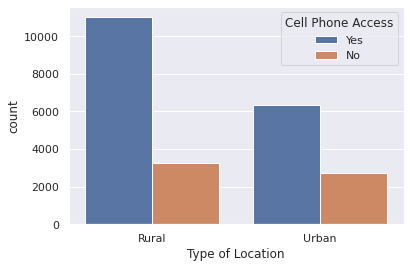

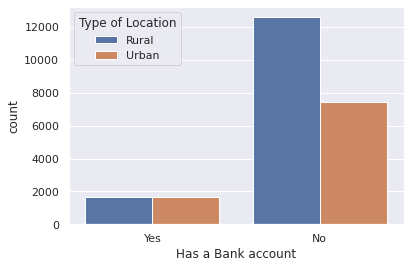

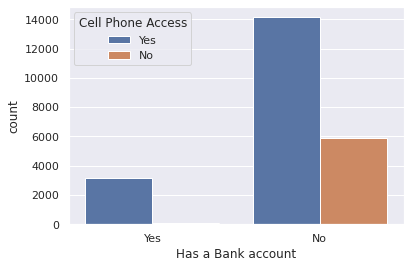

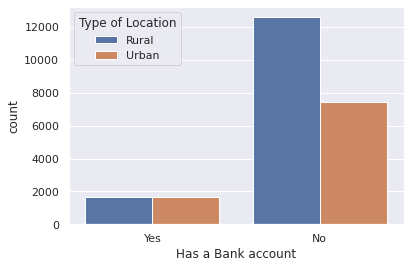

In [32]:
sns.set(style="darkgrid")
ax = sns.countplot(x='Type of Location', hue= "Cell Phone Access", data=df)
plt.show()

sns.set(style="darkgrid")
ax = sns.countplot(x='Has a Bank account', hue=  "Type of Location", data=df)
plt.show()

sns.set(style="darkgrid")
ax = sns.countplot(x='Has a Bank account', hue= "Cell Phone Access", data=df)
plt.show()

ax = sns.countplot(x='Has a Bank account', hue= "Type of Location", data=df)
plt.show()

Multivariate analysis using PCA

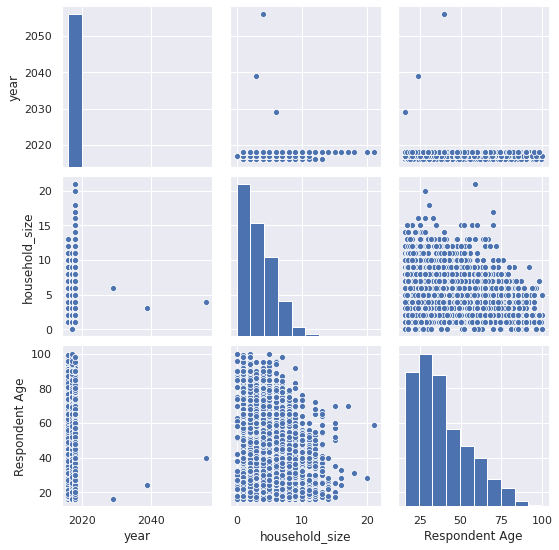

In [33]:
#pair plot
sns.pairplot(df)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have var

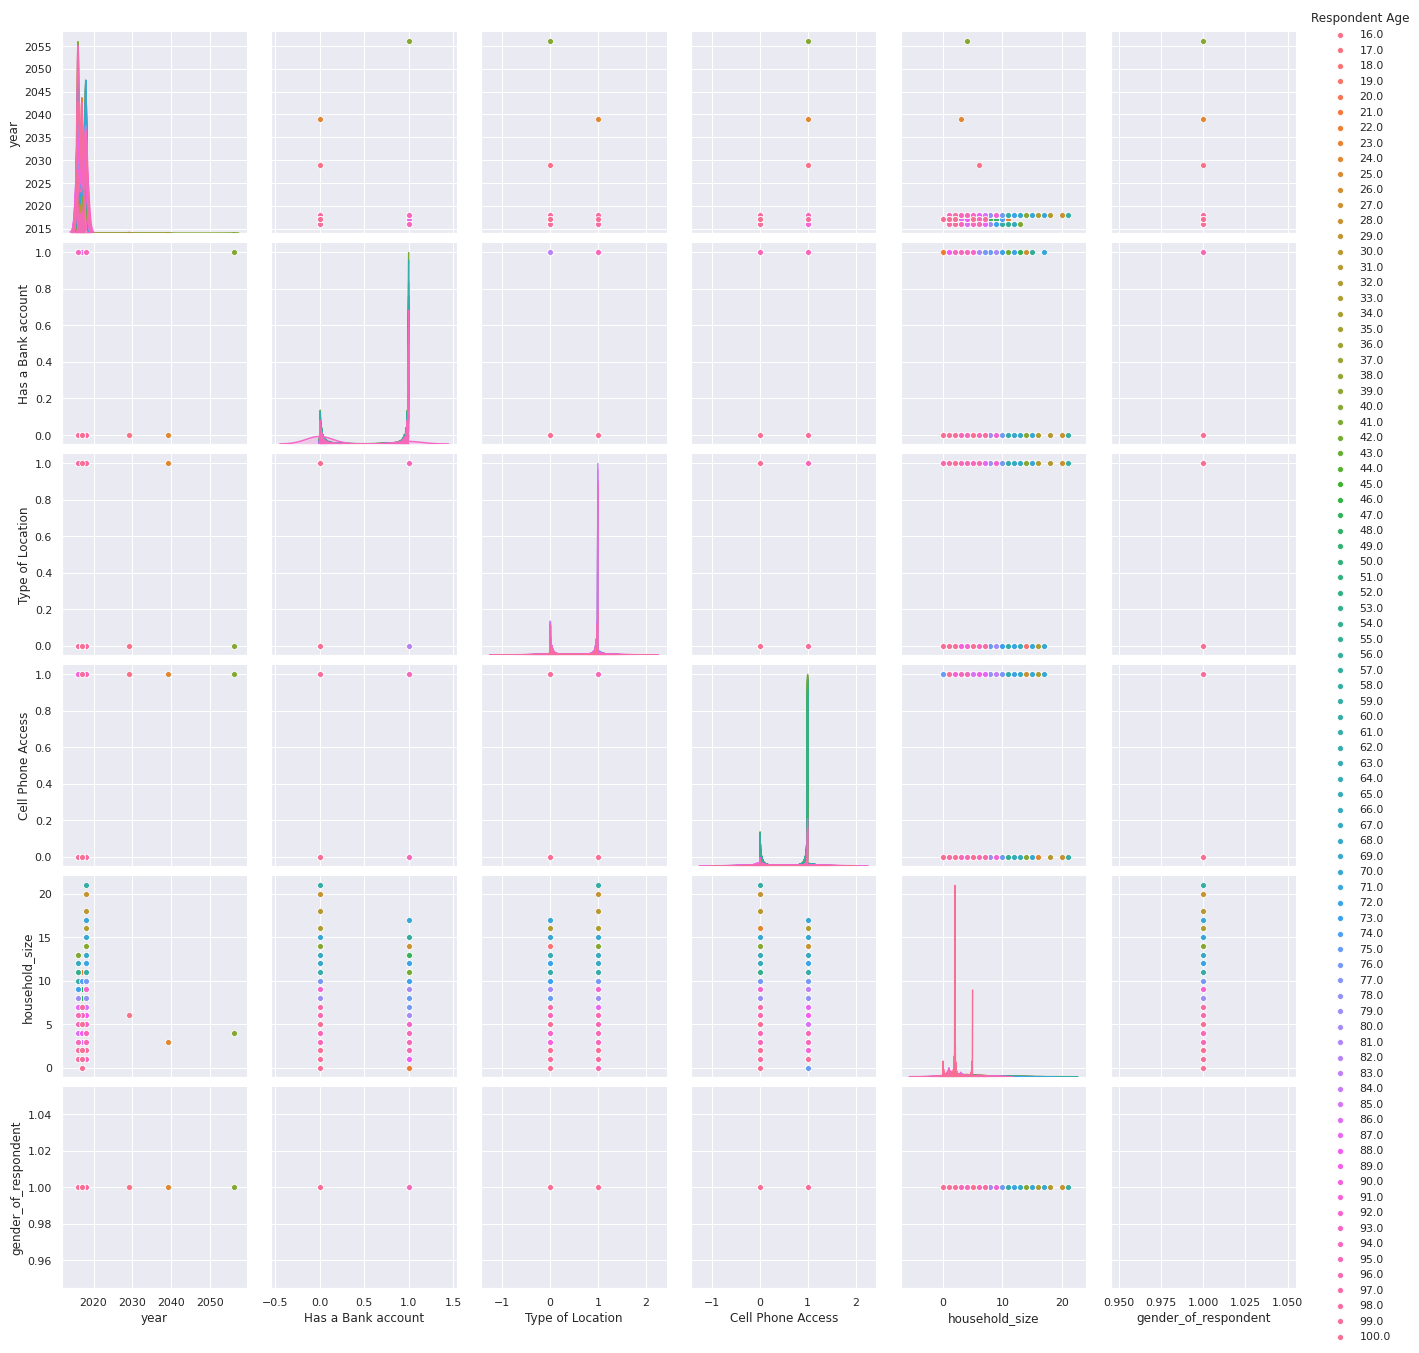

In [47]:
sns.pairplot(df, hue= "Respondent Age", size=3)
plt.show()

ANALYSIS USING PCA

In [12]:
#label data that has two outcomes
encode={"Has a Bank account" : {"Yes" : 1, "No": 0},"Type of Location" : {"Rural" : 1, "Urban" : 0},"Cell Phone Access" : {"Yes" : 1, "No" : 0}, "gender_of_respondent" : {"Female" : 1, "Male" : 1}}

In [13]:
df.replace(encode, inplace = True)
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1,1,1,3.0,24.0,1,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,1,0,5.0,70.0,1,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,0,1,5.0,26.0,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,1,1,5.0,34.0,1,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,0,0,8.0,26.0,1,Child,Single/Never Married,Primary education,Informally employed


In [16]:
#dropping unnecessary columns
df.drop(['country','uniqueid','The relathip with head','marital_status','Level of Educuation','Type of Job'],axis = 1, inplace =True)

In [21]:
#defining the variables
X= df.drop('Has a Bank account',1)
y= df['Has a Bank account']

In [22]:
# dividing the  data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
#importing PCA for our analysis
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [25]:
#finding the explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.28528862, 0.22370734, 0.18931856, 0.17271176, 0.12897372,
       0.        ])

In [26]:
#using the first principal component for analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [27]:
#Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [28]:
# evaluating the perfomance

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[4008    0]
 [ 661    0]]
Accuracy0.8584279288926965
